**Introduction :-**
The data set is a colection of 1999 tweets.The Data appears to be in it raw form so processing of the data has to be done before any analysis.

**Objective** :- Performance of  Sentiment anlaysis on the DataSet has to be Done. Based on my understanding it is assumed that we have to determine wheter a tweet is implying a Possitive, Negative or Neural Sentiment.

**Working** :- The Steps to be followed in the analysis are as follows


1. DataFrame is first preprocessed like :- a. Tags Removal b. Punchuation removal c. Removal of Leading and Trailing Spaces d. Removing Stop words

2. The Sentiment intensity Analyzer of Vedor lexicon is used to determine the possitve, negative of Neutral Nature of individual tweets

3. The above step is excecuted using a user defined function based on  The Sentiment intensity Analyzer and applied to every entry of the DataFrame.

4. The Analysis is finally concluded by drawing a pie-chart showing the count of Possitive, Negative and Neutral Tweets respectivly.

In [1]:
import numpy as np
import pandas as pd
import string
import spacy
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets = pd.read_csv('Elon_musk.csv',on_bad_lines='skip',encoding='latin')

In [3]:
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
tweets.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [5]:
tweets.shape

(1999, 2)

In [6]:
tweets.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [7]:
tweets.drop('Unnamed: 0',axis = 1,inplace = True)

In [8]:
tweets.head(3)

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!


In [9]:
tweets.tail(3)

,Text
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,Progress update August 28


In [10]:
cleaned_tweets = [re.sub(r'@\w+', '', text) for text in tweets['Text']]  # Removing Tags from the tweets
no_punc_tweets = pd.Series(cleaned_tweets).apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))  # Removing all punctuation
no_punc_tweets = no_punc_tweets.str.strip().replace('', pd.NA).dropna()  # Remove leading and trailing spaces and filter out empty strings
no_punc_tweets[1:5]  # First 5 tweets after processing

1    Ray tracing on Cyberpunk with HDR is nextlevel...
2                                      Great interview
3                               Doge is underestimated
4    Congratulations Tesla China for amazing execut...
dtype: object

Removing Stop words

In [11]:
import nltk
from nltk.corpus import stopwords
# Download the stopwords dataset
nltk.download('stopwords')

# Remove stop words
stop_words = set(stopwords.words('english'))
no_stopwords_tweets = no_punc_tweets.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

no_stopwords_tweets[1:5]  # First 5 tweets after processing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1            Ray tracing Cyberpunk HDR nextlevel tried
2                                      Great interview
3                                  Doge underestimated
4    Congratulations Tesla China amazing execution ...
dtype: object

Using The Sentiment Intensity Analyser tagging the  tweet as possitve or negative

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
sia = SentimentIntensityAnalyzer()

In [15]:
sia.polarity_scores(no_stopwords_tweets[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
sia.polarity_scores(no_stopwords_tweets[1])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
sia.polarity_scores(no_stopwords_tweets[2])

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

In [18]:
def get_vader_sentiment(review):
    '''
    The function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text
    analysis = sia.polarity_scores(review)
    # set sentiment
    if analysis["compound"] > 0:
        return 'positive sentiment'
    elif analysis["compound"] < 0:
        return 'negative sentiment'
    else:
        return 'neutral Sentiment'

In [19]:
no_stopwords_tweets.head()

0                                            Im alien
1            Ray tracing Cyberpunk HDR nextlevel tried
2                                      Great interview
3                                  Doge underestimated
4    Congratulations Tesla China amazing execution ...
dtype: object

In [20]:
tweets['Sentiment'] = no_stopwords_tweets.apply(lambda x:get_vader_sentiment(x))
tweets.head()

,Text,Sentiment
0,@kunalb11 Im an alien,neutral Sentiment
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,neutral Sentiment
2,@joerogan @Spotify Great interview!,positive sentiment
3,@gtera27 Doge is underestimated,negative sentiment
4,@teslacn Congratulations Tesla China for amazi...,positive sentiment


In [21]:
tweets.tail()

,Text,Sentiment
1994,"@flcnhvy True, it sounds so surreal, but the n...",neutral Sentiment
1995,@PPathole Make sure to read ur terms &amp; con...,positive sentiment
1996,@TeslaGong @PPathole Samwise Gamgee,neutral Sentiment
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,negative sentiment
1998,Progress update August 28,positive sentiment


In [23]:
possitve_senti_tweets = len(tweets[tweets['Sentiment'] == 'positive sentiment'])
negative_senti_tweets = len(tweets[tweets['Sentiment'] == 'negative sentiment'])
neutral_senti_tweets = len(tweets[tweets['Sentiment'] == 'neutral Sentiment'])
print(f"Total Possitive Sentiment Tweets are {possitve_senti_tweets}")
print(f"Total Negative Sentiment Tweets are {negative_senti_tweets}")
print(f"Total Neutral Sentiment Tweets are {neutral_senti_tweets}")


Total Possitive Sentiment Tweets are 902
Total Negative Sentiment Tweets are 193
Total Neutral Sentiment Tweets are 896


Pie-Chart to represent the sentiment counts

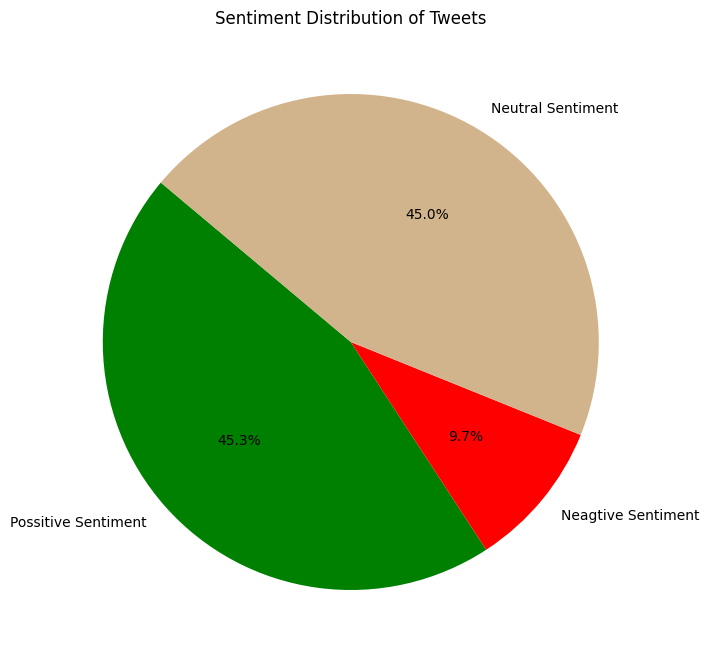

In [28]:
sentiment_counts = [possitve_senti_tweets,negative_senti_tweets,neutral_senti_tweets]
labels = ['Possitive Sentiment', 'Neagtive Sentiment', 'Neutral Sentiment']
colors = ['Green','Red','Tan']

plt.figure(figsize=(8,10))
plt.pie(sentiment_counts,labels=labels,colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution of Tweets")
plt.show()